# Weighted ECM clustering
## Toys dataset - 2 clusters, 6 dimensions


In [10]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, plotting
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


          0         1         2         3         4         5
0  0.223248  2.606554 -0.669845 -3.047209  4.858650  0.967867
1  0.570278 -0.831117 -1.704321  0.561818  0.178342  0.884180
2  1.393925  0.676908  1.102410 -2.709991 -0.611678  1.199641
3  2.329831 -3.047742 -1.956628  6.087984 -2.378940  1.282781
4  3.288549  0.391498 -0.672776 -1.564350  1.259775  0.482085


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


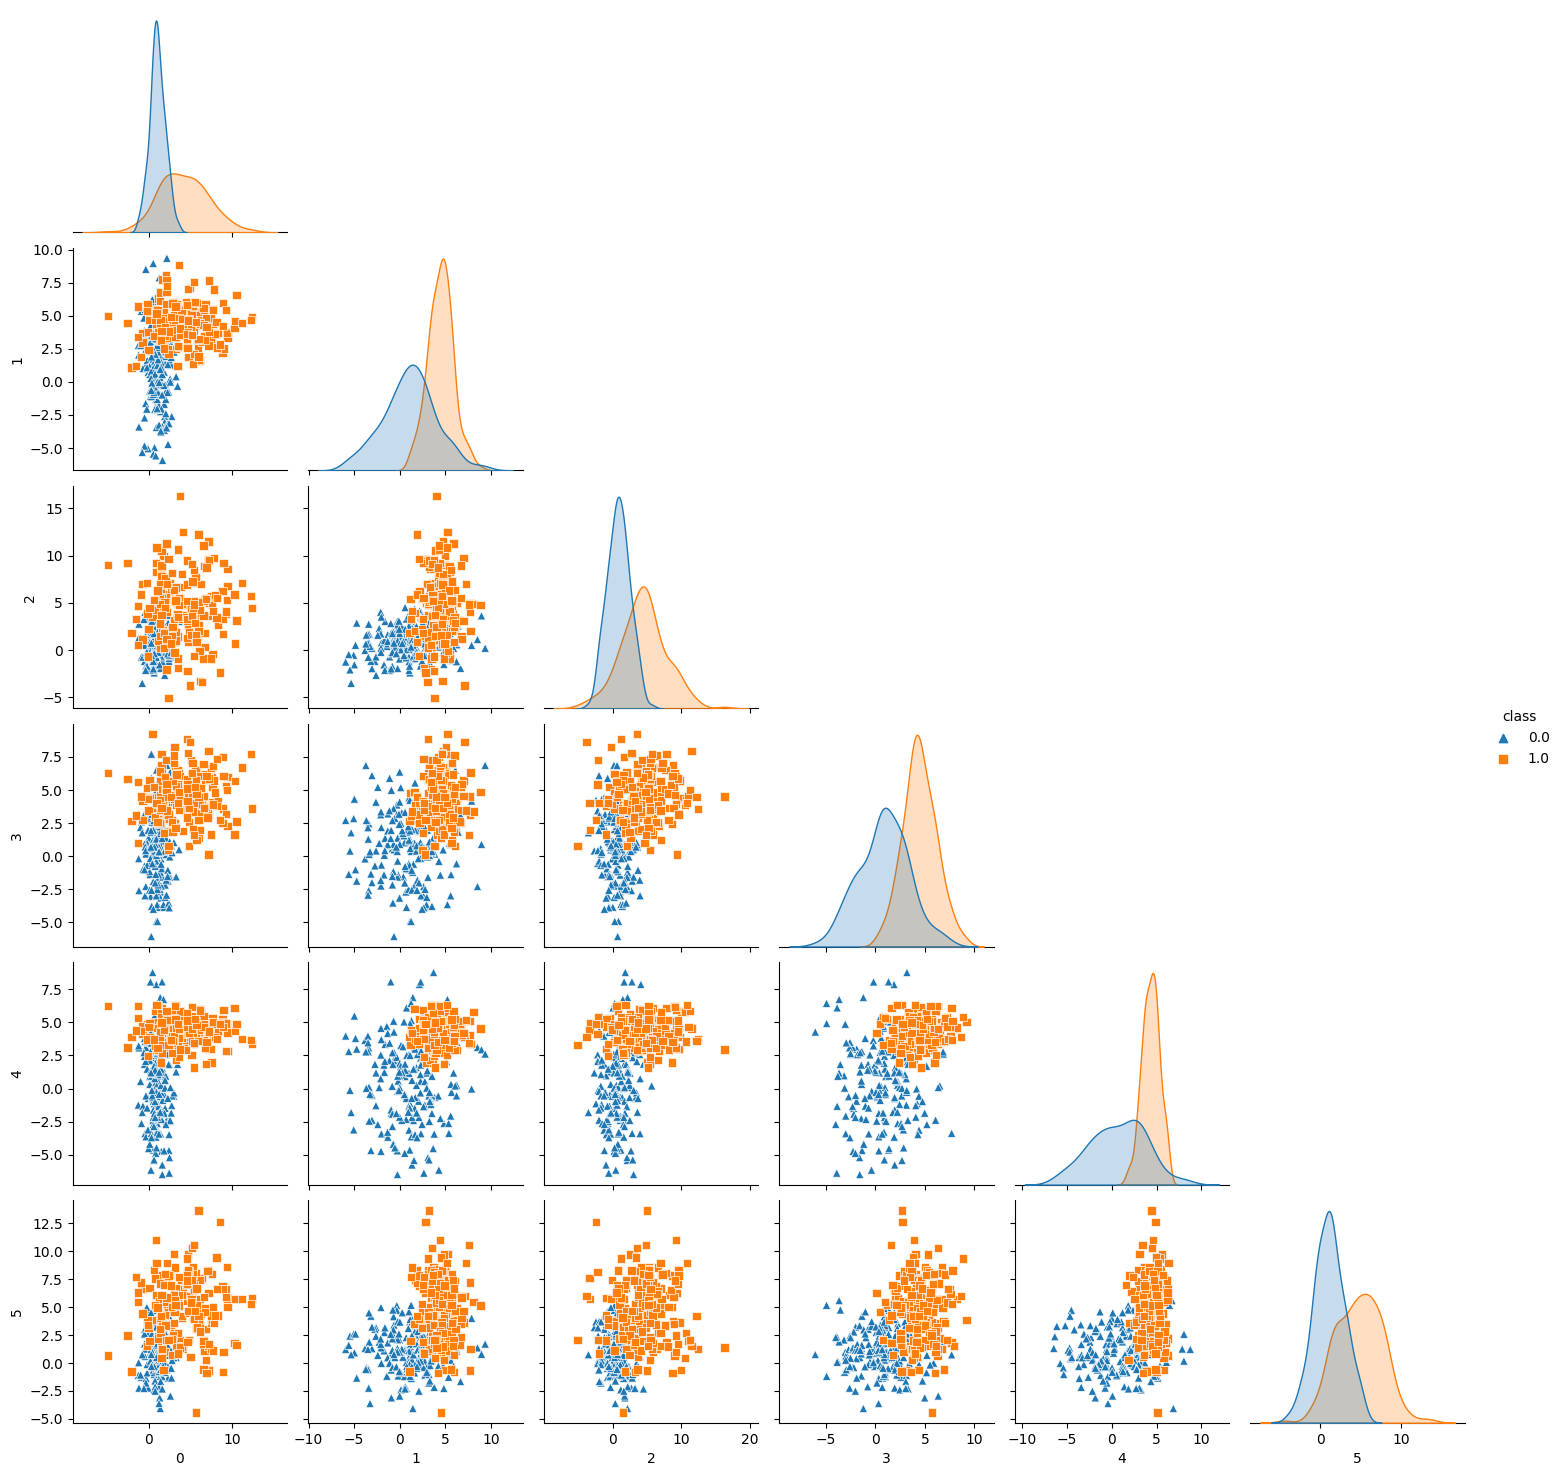

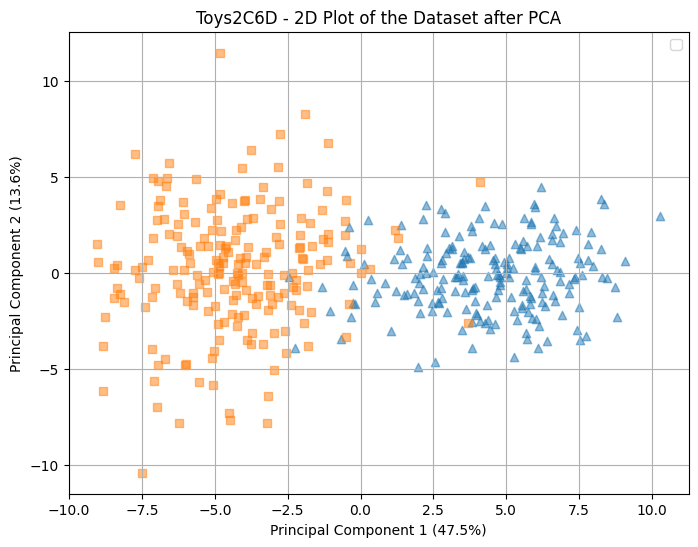

In [11]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c6dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1]) 

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C6D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 0.         25.64678996 25.64678996]
[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 1.         25.64678996 25.64678996]
[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 2.         25.64678996 25.64678996]
[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 3.         25.64678996 25.64678996]
[1, 25.67470466846274]
[2, 25.649156379923546]
[3, 25.647062038623027]
[4, 25.646771971452743]
[ 4.         25.64677197 25.64677197]
[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 5.         25.64678996 25.64677197]
[1, 25.674685824600473]
[2, 25.64946446830224]
[3, 25.647140457201306]
[4, 25.646789963192347]
[ 6.         25.64678996 25.64677197]
[1, 25.674685824600477]
[2, 25.649464468302245]
[3, 25.647140457

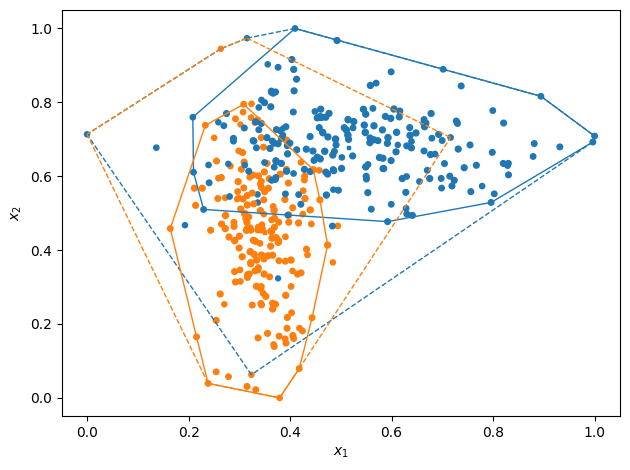

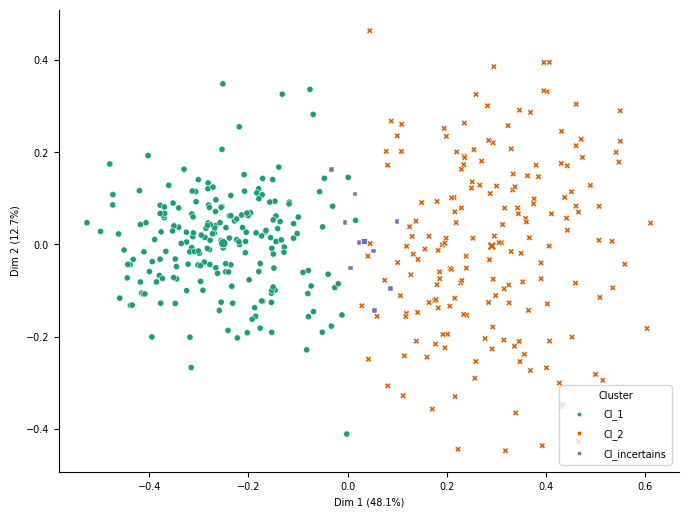

In [12]:
# Traditional ECM clustering
delta = np.sqrt(20)
model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, ntrials=10)
# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)


ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

## Weighted ECM (WECM)

In [13]:
# Weighted ECM clustering
# W = np.array([
#     [0.13792264, 0.24030843, 0.09318587, 0.17356215, 0.13044615, 0.22457475],
#     [0.19931167, 0.09494171, 0.16096384, 0.1729821, 0.15321458, 0.2185861]
# ])
model_list = np.array([])
for i in range(30):
    c = 2
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, W=None, beta=2, alpha=1, delta=delta, ntrials=10)
    model_list = np.append(model_list, model)
    
# Get best 10 models with minimum values
num = 10
model_list = sorted(model_list, key=lambda x : x['crit'])
print([x['crit'] for x in model_list])
top_weights = [model['W'] for model in model_list[:num]]

# Get ARI values of top 10
true_labels = numeric_labels
predicted_labels_list = [np.argmax(model['betp'], axis=1) for model in model_list[:num]]
top_aris = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]
print(f"ARIs: {top_aris}")

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list[:num]]
print(f"Non-specificities: {top_NS}")

Initial weights: 
 [[0.00576694 0.06372026 0.34653192 0.29109313 0.0183227  0.27456505]
 [0.01193662 0.02701262 0.08404681 0.27112673 0.26390594 0.34197129]]
---------Iteration #1---------
Initial prototypes: 
 [[0.51608367 0.6843522  0.44536475 0.68131167 0.70911369 0.50223468]
 [0.34221777 0.43724886 0.2707645  0.4456939  0.45501457 0.30204394]]
[1, 1.1391486305233418]
[2, 0.7531962460718237]
[3, 0.7287895108118204]
[4, 0.7263094321982236]
[5, 0.7253843584822706]
[0.         0.72538436 0.72538436]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[0.5149722  0.68411437 0.44425075 0.68130474 0.70854586 0.50191259]
 [0.34256365 0.43618828 0.27110935 0.4444283  0.4542979  0.30133441]]
[1, 1.1389735272318835]
[2, 0.7531598439720626]
[3, 0.7287855141099291]
[4, 0.7263082163910101]
[5, 0.7253840403900256]
[1.         0.72538404 0.72538404]
---------End Iteration #2---------
---------Iteration #3---------
Initial prototypes: 
 [[0.34256365 0.43618828 0

----------Weighted ECM----------
Jbest: 0.5666205139723898
Centers: 
[[0.60087351 0.6764973  0.45430325 0.6900467  0.71031891 0.51312029]
 [0.34218985 0.47708134 0.28782333 0.47392079 0.4864574  0.31945687]]
Weights: 
[[0.04921683 0.10375113 0.10822739 0.15877835 0.30884612 0.27118018]
 [0.59439999 0.06636196 0.16730647 0.05542434 0.08031316 0.03619408]]
Adjusted Rand Index (ARI) of the best J: 0.8000550734211276
Average ARI: 0.816128713438175
Average Non-specificity: 0.9588646260645213


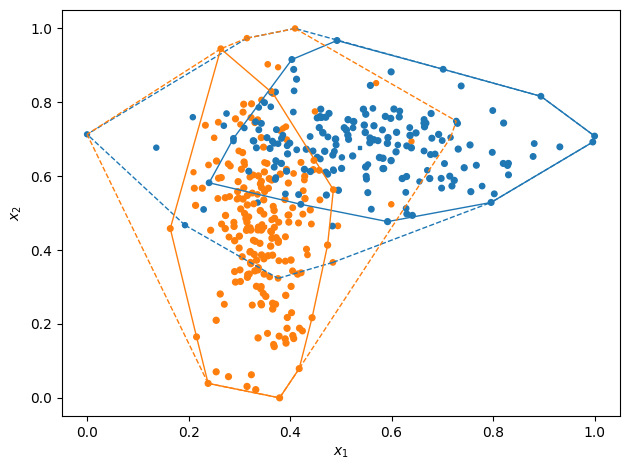

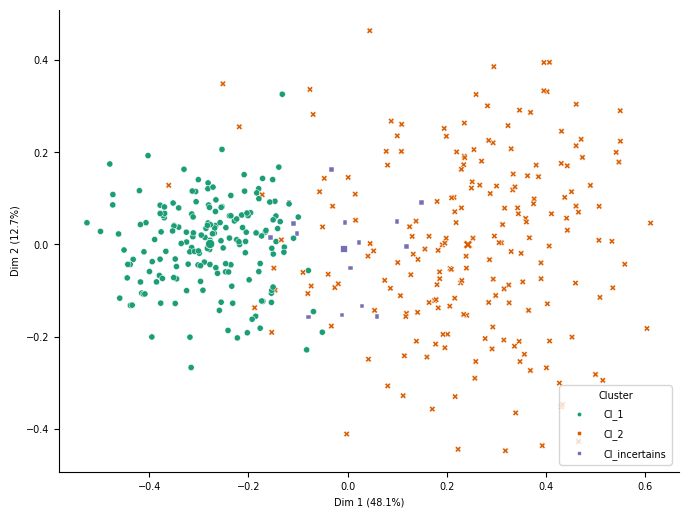

In [14]:
best_model = model_list[0]
print("----------Weighted ECM----------")
print(f"Jbest: {best_model['crit']}")
print(f"Centers: \n{best_model['g']}")
print(f"Weights: \n{best_model['W']}")
print(f"Adjusted Rand Index (ARI) of the best J: {top_aris[0]}")
print(f"Average ARI: {np.mean(top_aris)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")

# Plotting
ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

In [15]:
for W in top_weights:
    print(f"\n{W}")


[[0.04921683 0.10375113 0.10822739 0.15877835 0.30884612 0.27118018]
 [0.59439999 0.06636196 0.16730647 0.05542434 0.08031316 0.03619408]]

[[0.17835252 0.02421604 0.41803158 0.12004845 0.09783154 0.16151988]
 [0.1405538  0.27914725 0.05701535 0.23405378 0.2463092  0.04292062]]

[[0.0896345  0.07433628 0.40060738 0.14704631 0.09069245 0.19768308]
 [0.06737616 0.10807243 0.10313976 0.16314213 0.35275637 0.20551315]]

[[0.12595493 0.16618688 0.25314197 0.20134502 0.18959362 0.06377758]
 [0.17291928 0.06545137 0.39270019 0.14499015 0.06543054 0.15850847]]

[[0.10950529 0.11924536 0.15287024 0.34460487 0.18005293 0.09372131]
 [0.16501863 0.10240138 0.15855795 0.16249546 0.10513278 0.30639381]]

[[0.17469849 0.11340906 0.29981409 0.15853201 0.0998703  0.15367605]
 [0.12630633 0.1036393  0.24530344 0.17360866 0.15503381 0.19610846]]

[[0.22797883 0.12023295 0.20480621 0.08434241 0.19101408 0.17162551]
 [0.10637034 0.16982324 0.25151911 0.19787524 0.1680258  0.10638628]]

[[0.19847572 0.1771